In [1]:
#load libs
import keras.models

import os
import utils.io as io

/users/musella/my-env3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
# load data
base_dir = os.path.expandvars('$SCRATCH')+'/diphotonID/'

data = io.read_data(base_dir+'samples/diphoton_id_s+b_test.hd5', columns = None )

In [3]:
# list all model files in the training folder
target=base_dir+'NN_output/binary_crossentropy/'
models = !ls -lht $target*.hdf5
print('\n'.join(models))
last_model = models[0].split()[-1]

-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:31 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-14.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:26 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-11.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:23 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-09.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:20 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-07.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:18 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-06.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:16 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-05.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:15 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-04.hdf5
-rw-r--r-- 1 spigazzi d78 57M Jul 18 18:13 /scratch/snx3000/spigazzi/diphotonID/NN_output/binary_crossentropy/model-03.hdf5
-rw-r--r

In [4]:
# read training configuration
import json
with open('%s/config.json' % target) as fin:
    config = json.loads(fin.read())
config

{'Trainable_params': 4904853,
 'Nontrainable_params': 12052,
 'model_params': {'activations': ['relu',
   'relu',
   'relu',
   'relu',
   'relu',
   'relu',
   'relu',
   'relu'],
  'batch_norm': True,
  'const_output_biases': None,
  'do_bn0': True,
  'dropout': 0.2,
  'input_shape': [10],
  'layers': [1024, 1024, 1024, 1024, 1024, 512, 256, 128],
  'loss': 'binary_crossentropy',
  'loss_params': {},
  'monitor_dir': '/scratch/snx3000/spigazzi/diphotonID/NN_output//binary_crossentropy/',
  'name': 'ffwd',
  'non_neg': False,
  'optimizer': 'Adam',
  'optimizer_params': {'lr': 0.0001},
  'output_shape': [1],
  'save_best_only': True,
  'valid_frac': 0.1},
 'fit_kwargs': {'batch_size': 1024, 'epochs': 20},
 'options': {'inp_dir': '/scratch/snx3000/spigazzi/diphotonID/samples/',
  'out_dir': '/scratch/snx3000/spigazzi/diphotonID/NN_output//binary_crossentropy/',
  'inp_file': 'diphoton_id_s+b_train.hd5',
  'features': 'leadptom,subleadptom,leadmva,subleadmva,leadeta,subleadeta,sigmarv,s

In [5]:
features = config['options']['features'].split(',')
data['target'] = data['processIndex'] < 5

X = data[features].values
y = data['target'].values


In [6]:
model = keras.models.load_model(last_model,compile=False)

In [7]:
y_pred_NN = model.predict(X)

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

In [9]:
roc_NN = roc_curve(y, y_pred_NN,sample_weight=data['weight'])
roc_auc_score(y, y_pred_NN,sample_weight=data['weight'])

0.8192961145582932

In [68]:
import _pickle as pickle

with open(base_dir+'roc_xgb_d10_e500.pkl', 'rb') as fin:
    roc_xgb_d10_e500 = pickle.load(fin, encoding='latin1')

with open(base_dir+'roc_legacy_pre-train.pkl', 'rb') as fin:
    roc_legacy = pickle.load(fin, encoding='latin1')


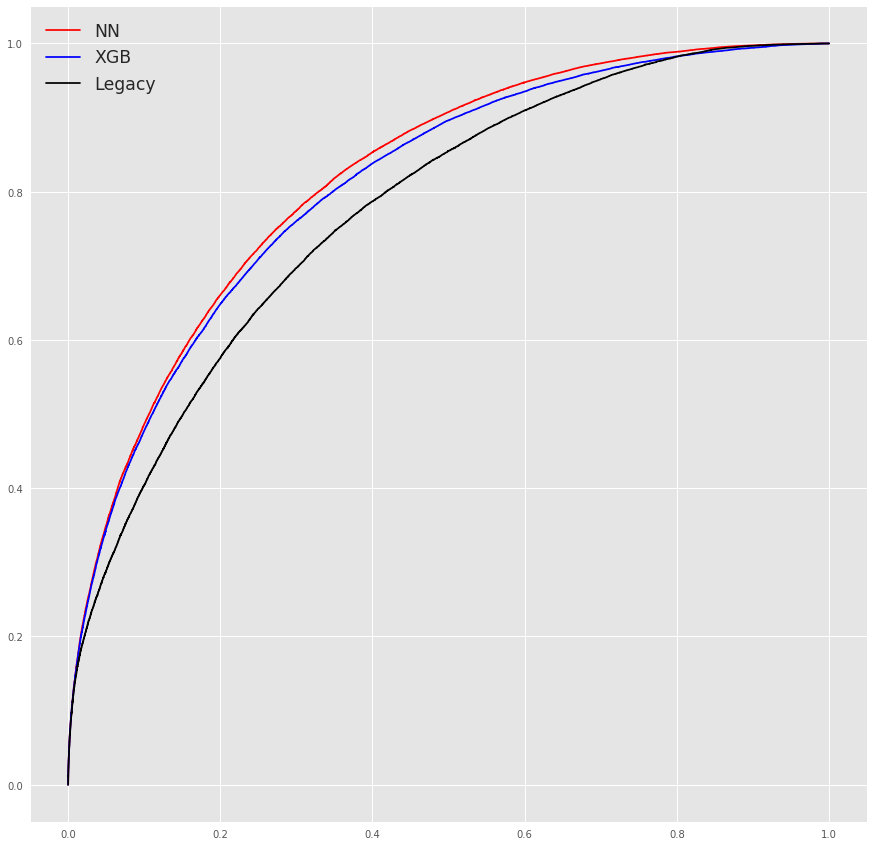

In [79]:
plt.style.use('seabolt')
plt.rcParams['figure.figsize'] = '15,15'
plt.plot(roc_NN[0], roc_NN[1], color='red')
plt.plot(roc_xgb_d10_e500[0], roc_xgb_d10_e500[1], color='blue')
plt.plot(roc_legacy[0], roc_legacy[1], color='black')
plt.legend(['NN', 'XGB', 'Legacy'], fontsize='xx-large')